In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!ls -l ~/.kaggle/

total 4
-rw-r--r-- 1 root root 66 May  2 14:53 kaggle.json


In [ ]:
!ls -ld ~/.kaggle/

drwxr-xr-x 2 root root 4096 May  2 14:53 /root/.kaggle/


In [ ]:
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/140k-real-and-fake-faces.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip install -U tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 130.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorfl

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/real_vs_fake/real-vs-fake/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

#batch size determines how many images are processed in each iteration during training or validation

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/real_vs_fake/real-vs-fake/valid',
    labels='inferred',
    label_mode = 'int',  # assign int to images ---fake --0 and real-----1
    batch_size=32,     #generators---batch ---divisions   "" batch size determines how many samples are processed in each iteration
    image_size=(256,256)  #assigning same size to every image or dimension of image
)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [ ]:
#normalization(scaling)
def process(image,label):
  image =tf.cast(image/255. ,tf.float32)
  return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [ ]:
#creating cnn model
# three layers
model = Sequential()  # layer formation

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#32---filters, kernel_size means filter size
#kernel-size 3,3  ----- filter grid
#The input shape is (256, 256, 3), representing a 256x256 image with three color channels (RGB).

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#64---filters
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
#decision making
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
# 128 and 64 representing images or neurons which are helping in decision making whether the image is of cat or dog
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#model execute

history= model.fit(train_dataset,epochs=8,validation_data=validation_dataset)

Epoch 1/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 279s 85ms/step - accuracy: 0.5570 - loss: 1.1577 - val_accuracy: 0.7758 - val_loss: 0.5023
Epoch 2/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 324s 89ms/step - accuracy: 0.7651 - loss: 0.5114 - val_accuracy: 0.7896 - val_loss: 0.4338
Epoch 3/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 257s 82ms/step - accuracy: 0.8617 - loss: 0.3556 - val_accuracy: 0.6431 - val_loss: 1.0632
Epoch 4/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 252s 81ms/step - accuracy: 0.8832 - loss: 0.3184 - val_accuracy: 0.9241 - val_loss: 0.2300
Epoch 5/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 251s 80ms/step - accuracy: 0.9071 - loss: 0.2714 - val_accuracy: 0.8356 - val_loss: 0.4235
Epoch 6/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 251s 80ms/step - accuracy: 0.9230 - loss: 0.2333 - val_accuracy: 0.9301 - val_loss: 0.2865
Epoch 7/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 257s 82ms/step - accuracy: 0.9250 - loss: 0.2271 - val_accuracy: 0.9599 - val_loss: 0.1544
Epoch 8/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 257s 82ms/step - accuracy: 0.9337 -

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
model.save('/content/gdrive/My Drive/model.h5')

Mounted at /content/gdrive


In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    '/content/real_vs_fake/real-vs-fake/test',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32,
    shuffle=False
)
test_ds = test_ds.map(process)


Found 20000 files belonging to 2 classes.


In [ ]:
# Get predictions
y_true, y_pred, y_probs = [], [], []

for images, labels in test_ds:
    probs = model.predict(images)
    preds = (probs > 0.5).astype("int32").flatten()

    y_probs.extend(probs.flatten())
    y_pred.extend(preds)
    y_true.extend(labels.numpy())

# Evaluate performance using previously shared snippet


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)
import numpy as np
import pandas as pd

# Assuming y_true, y_pred, y_probs are already computed
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

metrics = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred),
    "Recall (Sensitivity)": recall_score(y_true, y_pred),
    "Specificity": tn / (tn + fp),
    "F1 Score": f1_score(y_true, y_pred),
    "AUC-ROC Score": roc_auc_score(y_true, y_probs),
    "False Positive Rate": fp / (fp + tn),
    "False Negative Rate": fn / (fn + tp)
}

# Create and display table
df_metrics = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
df_metrics["Value"] = df_metrics["Value"].apply(lambda x: f"{x:.2%}")
display(df_metrics)


,Metric,Value
0,Accuracy,91.08%
1,Precision,86.85%
2,Recall (Sensitivity),96.82%
3,Specificity,85.34%
4,F1 Score,91.56%
5,AUC-ROC Score,97.66%
6,False Positive Rate,14.66%
7,False Negative Rate,3.18%


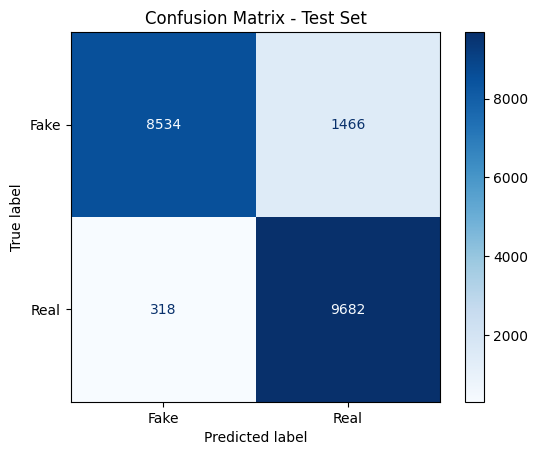

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix separately
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Collect all predictions and true labels from the validation dataset
y_true = []
y_pred = []

for images, labels in validation_dataset:
    preds = model.predict(images)
    preds = (preds > 0.5).astype("int32").flatten()  # Binary classification thresholding
    y_pred.extend(preds)
    y_true.extend(labels.numpy())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake (0)', 'Real (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Real vs Fake")
plt.show()


In [ ]:
test_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/real_vs_fake/real-vs-fake/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# Apply the same preprocessing (e.g., normalization)
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

test_dataset = test_dataset.map(process)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Collect predictions and labels from the test dataset
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    preds = (preds > 0.5).astype("int32").flatten()
    y_pred.extend(preds)
    y_true.extend(labels.numpy())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake (0)', 'Real (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Dataset")
plt.show()


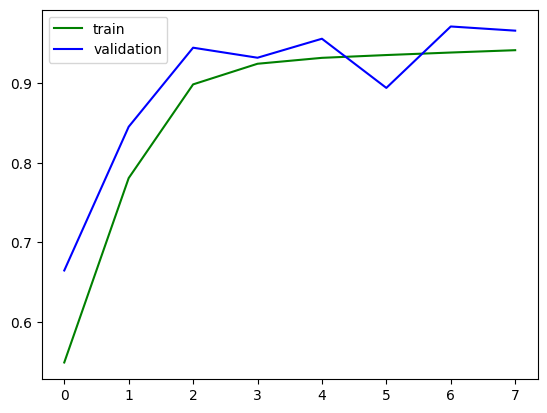

In [ ]:
import matplotlib.pyplot as mplot
mplot.plot(history.history['accuracy'],color='green',label='train')
mplot.plot(history.history['val_accuracy'],color='blue',label='validation')
mplot.legend()
mplot.show()